# 전국 신규 민간아파트 분양가격 동향

2015년 10월부터 2018년 7월까지  
주택분양보증을 받아 분양한 전체 민간 신규아파트 분양가격 동향  
데이터 다운로드 : https://www.data.go.kr/dataset/3035522/fileData.do

In [1]:
# %config InlineBackend.figure_format = 'retina'

# !apt -qq -y install fonts-nanum > /dev/null
# import matplotlib.font_manager as fm
# fontpath = '/Library/Fonts/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=fontpath, size=9)

# from plotnine import *
# import plotnine

In [2]:
from matplotlib import rc
import matplotlib.pyplot as plt

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

주피터 노트북 한글 설정

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import numpy as np
import re
from plotnine import *

In [5]:
pre_sale = pd.read_csv('data/apt_price/전국_평균_분양가격_2018.7월_.csv', encoding='euc-kr')
pre_sale.shape

(2890, 5)

공공데이터포털에 있는 데이터 파일은 대부분 utf-8로 구성되어 있기 때문에 판다스에서 불러오지 못하는 현상이 간혹 생긴다.  
이러한 현상을 방지하고자 encoding 타입을 euc-kr로 해줄 필요가 있다.  
2890행과 5개의 컬럼이 존재한다. 

In [6]:
pre_sale.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [7]:
pre_sale.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
2885,제주,전체,2018,7,3334
2886,제주,전용면적 60㎡이하,2018,7,NaN
2887,제주,전용면적 60㎡초과 85㎡이하,2018,7,3356
2888,제주,전용면적 85㎡초과 102㎡이하,2018,7,3226
2889,제주,전용면적 102㎡초과,2018,7,2990


In [8]:
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 5 columns):
지역명        2890 non-null object
규모구분       2890 non-null object
연도         2890 non-null int64
월          2890 non-null int64
분양가격(㎡)    2750 non-null object
dtypes: int64(2), object(3)
memory usage: 113.0+ KB


분양가격이 object 타입이기 때문에 숫자타입으로 변경해줄 필요가 있다. 

In [9]:
pre_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    140
dtype: int64

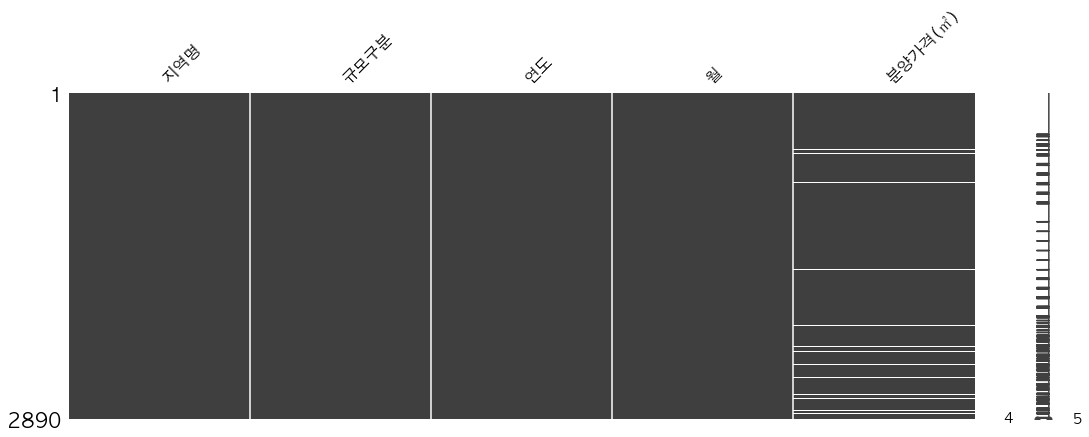

In [10]:
import missingno as msno
msno.matrix(pre_sale, figsize=(18,6))

In [11]:
pre_sale['연도'] = pre_sale['연도'].astype(str)
pre_sale['월'] = pre_sale['월'].astype(str)

연도와 월은 카테고리 형태의 데이터이기 때문에 스트링타입으로 변경

In [12]:
pre_sale_price = pre_sale['분양가격(㎡)']

In [13]:
# 분양 가격의 타입을 숫자형태로 변경해줄 필요가 있다. 
pre_sale['분양가격'] = pd.to_numeric(pre_sale_price, errors='coerce')
# 평당 분양가격을 구한다.
pre_sale['평당분양가격'] = pre_sale['분양가격'] * 3.3

In [14]:
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 7 columns):
지역명        2890 non-null object
규모구분       2890 non-null object
연도         2890 non-null object
월          2890 non-null object
분양가격(㎡)    2750 non-null object
분양가격       2658 non-null float64
평당분양가격     2658 non-null float64
dtypes: float64(2), object(5)
memory usage: 158.2+ KB


In [15]:
pre_sale.dtypes

지역명         object
규모구분        object
연도          object
월           object
분양가격(㎡)     object
분양가격       float64
평당분양가격     float64
dtype: object

In [16]:
pre_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    140
분양가격       232
평당분양가격     232
dtype: int64

분양가격(㎡)이 140이었는데 232로 늘어난 이유로는,  
object 타입이라서 공백값도 결측치가 아니라 값이 들어있는 것으로 인식했기 때문.

In [17]:
pre_sale.describe()

,분양가격,평당분양가격
count,2658.000000,2658.000000
mean,3063.297216,10108.880813
std,1112.743769,3672.054436
min,1868.000000,6164.400000
25%,2348.000000,7748.400000
50%,2743.000000,9051.900000
75%,3293.750000,10869.375000
max,8098.000000,26723.400000


In [18]:
#pre_sale.describe?

In [19]:
pre_sale.describe(include=np.object)

,지역명,규모구분,연도,월,분양가격(㎡)
count,2890,2890,2890,2890,2750
unique,17,5,4,12,1305
top,강원,전용면적 85㎡초과 102㎡이하,2016,7,2221
freq,170,578,1020,255,17


In [20]:
#2017년 데이터만 보기
pre_sale_2017 = pre_sale.loc[pre_sale['연도'] == '2017']
#pre_sale_2017 = pre_sale.loc[pre_sale['연도'] == 2017] 0개의 데이터를 가져옴.
pre_sale_2017.shape

(1020, 7)

In [21]:
# 같은 값을 가지고 있는 것으로 보아 시도별로 동일하게 데이터가 들어가 있는 것을 확인할 수 있음.
pre_sale['규모구분'].value_counts()

전용면적 85㎡초과 102㎡이하    578
전용면적 60㎡이하           578
전용면적 102㎡초과          578
전용면적 60㎡초과 85㎡이하     578
전체                   578
Name: 규모구분, dtype: int64

In [22]:
pre_sale['지역명'].value_counts()

강원    170
부산    170
대전    170
전남    170
서울    170
인천    170
전북    170
제주    170
세종    170
경기    170
광주    170
경북    170
충북    170
대구    170
충남    170
울산    170
경남    170
Name: 지역명, dtype: int64

# 전국 평균 분양가격

group by 와 pivot table 활용하기

In [23]:
pd.options.display.float_format = '{:,.0f}'.format
pre_sale.groupby(pre_sale.연도).describe()
pre_sale.groupby(pre_sale.연도).describe().T
# T는 transpose의 약자로 전치행렬처럼 행과 열을 바꾸는 것

연도             2015   2016   2017   2018
분양가격   count    243    984    899    532
       mean   2,789  2,934  3,140  3,299
       std      977  1,071  1,108  1,196
       min    1,868  1,900  1,976  2,076
       25%    2,225  2,282  2,365  2,471
       50%    2,516  2,672  2,849  2,914
       75%    3,026  3,148  3,456  3,647
       max    7,092  8,096  7,887  8,098
평당분양가격 count    243    984    899    532
       mean   9,203  9,683 10,360 10,885
       std    3,224  3,536  3,655  3,947
       min    6,164  6,270  6,521  6,851
       25%    7,342  7,531  7,804  8,154
       50%    8,303  8,818  9,402  9,616
       75%    9,984 10,390 11,405 12,036
       max   23,404 26,717 26,027 26,723

분양가격을 봤을 때 2015년에서 2018년도로 갈수록 오른 것을 확인할 수 있다. 

## 규모별 전국 평균 분양가격

In [24]:
#pre_sale.pivot_table?

In [25]:
pre_sale.pivot_table(values='평당분양가격', index='규모구분', columns='연도') # values, index, columns

연도,2015,2016,2017,2018
규모구분,,,,
전용면적 102㎡초과,"9,837","10,389","11,334","11,235"
전용면적 60㎡이하,"8,952","9,399","10,246","10,912"
전용면적 60㎡초과 85㎡이하,"8,892","9,296","9,825","10,464"
전용면적 85㎡초과 102㎡이하,"9,519","10,122","10,540","11,483"
전체,"8,893","9,293","9,901","10,563"


## 전국 분양가 변동 금액

In [26]:
# 규모구분이 전체로 되어있는 것만 가져온다.
region_year_all = pre_sale.loc[pre_sale['규모구분'] == '전체']
region_year = region_year_all.pivot_table('평당분양가격', '지역명', '연도').reset_index()
# reset_index : 기존의 행 인덱스를 제거하고 인덱스를 데이터 열로 추가
region_year

연도,지역명,2015,2016,2017,2018
0,강원,"7,160","7,011","7,127","7,641"
1,경기,"10,377","11,220","11,850","12,881"
2,경남,"7,586","7,848","8,120","8,894"
3,경북,"7,171","7,361","7,795","8,342"
4,광주,"8,052","8,899","9,464","9,638"
5,대구,"9,232","10,310","11,456","11,737"
6,대전,"8,098","8,502","9,045","9,604"
7,부산,"10,307","10,430","11,578","12,756"
8,서울,"19,725","20,663","21,376","22,329"
9,세종,"8,750","8,860","9,135","10,375"


In [27]:
region_year['변동액'] = (region_year['2018'] - region_year['2015']).astype(int)
max_delta_price = np.max(region_year['변동액']) * 1000
min_delta_price = np.min(region_year['변동액']) * 1000
mean_delta_price = np.mean(region_year['변동액']) * 1000

region_year

연도,지역명,2015,2016,2017,2018,변동액
0,강원,"7,160","7,011","7,127","7,641",481
1,경기,"10,377","11,220","11,850","12,881",2503
2,경남,"7,586","7,848","8,120","8,894",1308
3,경북,"7,171","7,361","7,795","8,342",1171
4,광주,"8,052","8,899","9,464","9,638",1585
5,대구,"9,232","10,310","11,456","11,737",2504
6,대전,"8,098","8,502","9,045","9,604",1506
7,부산,"10,307","10,430","11,578","12,756",2449
8,서울,"19,725","20,663","21,376","22,329",2603
9,세종,"8,750","8,860","9,135","10,375",1624


In [28]:
print('2015년부터 2018년까지 분양가는 계속 상승하였으며, 상승액이 가장 큰 지역은 제주이며 상승액은 평당 {:,.0f}원이다'.format(max_delta_price))
print('상승액이 가장 작은 지역은 울산이며 평당 {:,.0f}원이다.'.format(min_delta_price))
print('나중에 살펴보겠지만 울산에는 결측치가 많다. 그러므로 변동액이 가장 작다고 판단하기 어렵다.')
print('전국 평균 변동액은 {:,.0f}원이다.'.format(mean_delta_price))

2015년부터 2018년까지 분양가는 계속 상승하였으며, 상승액이 가장 큰 지역은 제주이며 상승액은 평당 5,087,000원이다
상승액이 가장 작은 지역은 울산이며 평당 369,000원이다.
나중에 살펴보겠지만 울산에는 결측치가 많다. 그러므로 변동액이 가장 작다고 판단하기 어렵다.
전국 평균 변동액은 1,669,588원이다.


## 연도별 변동 그래프 

### seaborn으로 그래프 그리기

공공데이터포털에서 제공하고 있는 데이터 셋을 지역별, 연도별로 그려본다.

In [29]:
import seaborn as sns
sns.set_style('whitegrid')

plt.rc('font', family='AppleGothic')

막대 그래프(-graph), 바 차트(bar chart), 바 그래프(bar graph)는 표현값에 비례하여 높이와 길이를 지닌 직사각형 막대로 범주형 데이터를 표현하는 차트나 그래프를 말한다. 막대는 수직으로나 수평으로 그릴 수 있다. 수직 막대 그래프는 선 그래프 또는 라인 그래프(line graph)라고도 한다. 

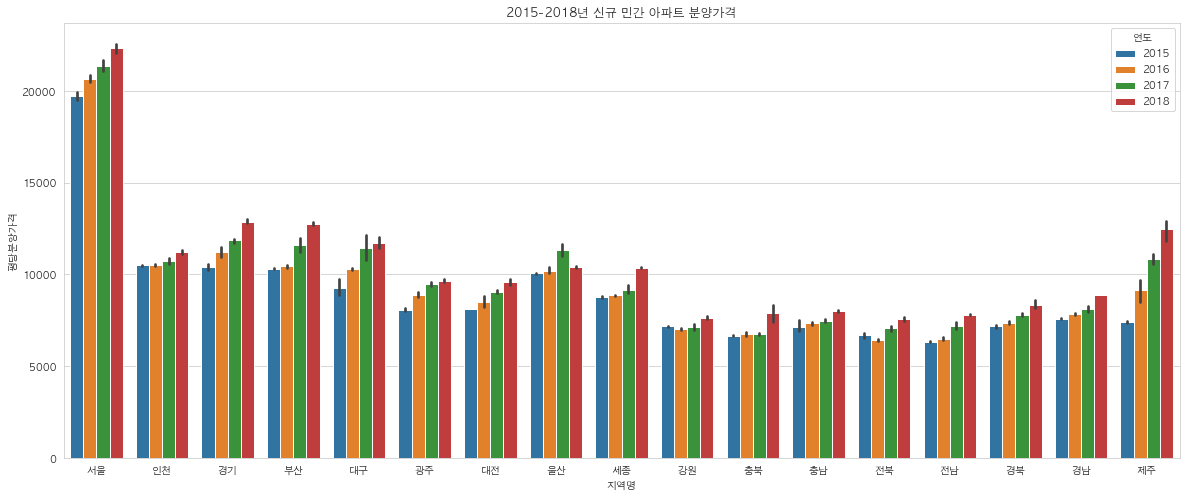

In [30]:
plt.figure(figsize=(20,8))
plt.title('2015-2018년 신규 민간 아파트 분양가격')
sns.barplot(data=region_year_all, x='지역명', y='평당분양가격', hue='연도')

# shift + tab
# 위의 있는 검은색 막대는 ci으로 분산의 정도를 나타내는 것이다. 길수록 데이터가 많이 퍼져있음을 알 수 있다. (편차가 크다)
# 선이 많이 길면 양 극단에 있는 이상치라고 볼 수 있다. 

In [31]:
df_year_region = pd.pivot_table(region_year_all, '평당분양가격', '지역명', '연도')
df_year_region.sample(3)

연도,2015,2016,2017,2018
지역명,,,,
경기,"10,377","11,220","11,850","12,881"
충남,"7,115","7,331","7,456","7,997"
울산,"10,053","10,209","11,345","10,422"


### 판다스로 그래프 그리기

In [32]:
df_year_region.columns

Index(['2015', '2016', '2017', '2018'], dtype='object', name='연도')

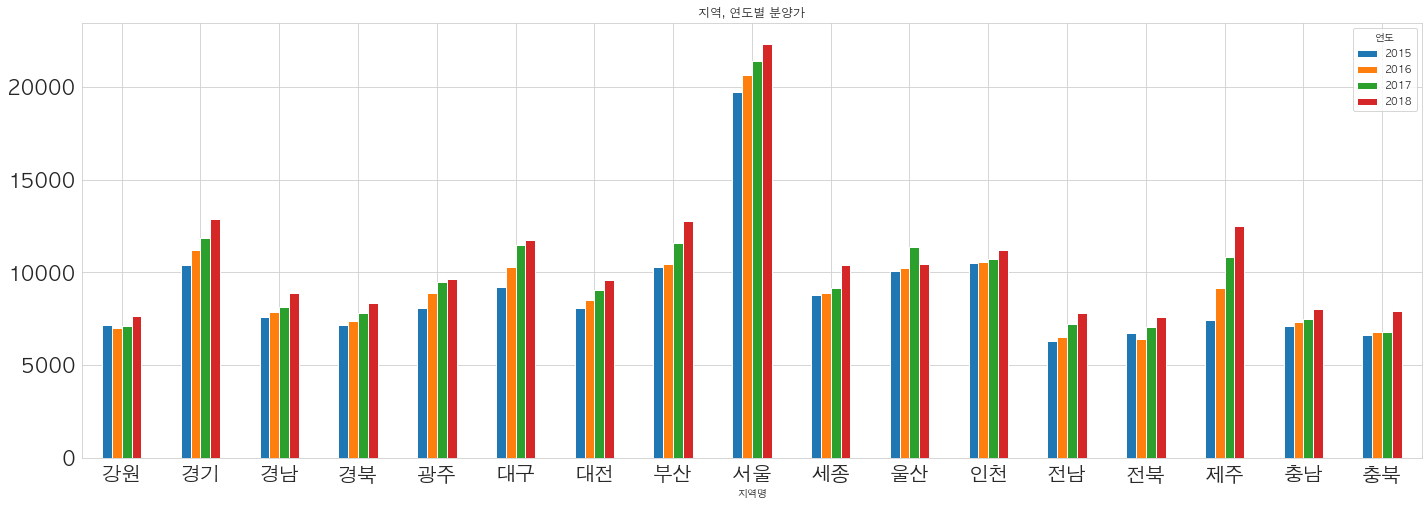

In [33]:
df_year_region.plot.bar(figsize=(24,8), grid=True, fontsize=20, rot=0, title='지역, 연도별 분양가')
#rot은 각도를 적어주는것으로 0일 경우 글씨가 평면으로 나타남.

### seaborn과 pandas로 막대 그래프를 그릴 때에 차이점

판다스는 그릴 정보를 요약해서 다시 데이터프레임을 만드는 과정을 거쳐야 한다. 데이터의 순서가 데이터셋의 순서이다.  
seaborn은 원래 있던 데이터프레임에서 몇 가지 정보를 추출하여 만들기 때문에 따로 작업을 해줄 필요가 없다. 데이터의 순서가 많은 순서부터이다. 

# 규모별

+ seaborn의 barplot은 기본값을 평균으로 구한다.   
+ 각각의 막대 그래프 상단에 있는 검은색 선은 신뢰구간을 의미한다.  
+ 통계학에서 신뢰구간(confidence interval)은 모수가 어느 범위 안에 있는지를 확률적으로 보여주는 방법이다.   
+ seaborn의 barplot의 옵션 중 ci가 이 신뢰 구간을 의미하며 기본값은 95이다.  
+ 표본의 95%의 데이터가 검은색 선 안에 위치하고 있음을 알 수 있다.   
+ 나머지 5%의 데이터는 이 표본을 벗어나는 데이터로 너무 크거나 작은 데이터를 제외하고 볼 수 있다.  
+ 따라서 이 검은색 선을 벗어나는 데이터는 이상치(outlier)로 볼 수도 있다. 

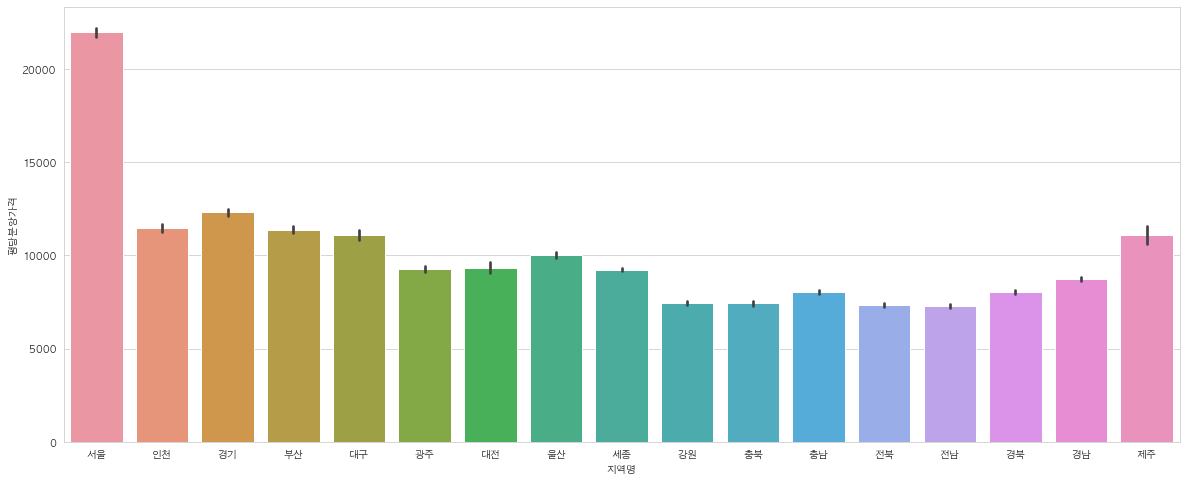

In [34]:
plt.figure(figsize=(20, 8))
sns.barplot(data=pre_sale, x='지역명', y='평당분양가격')

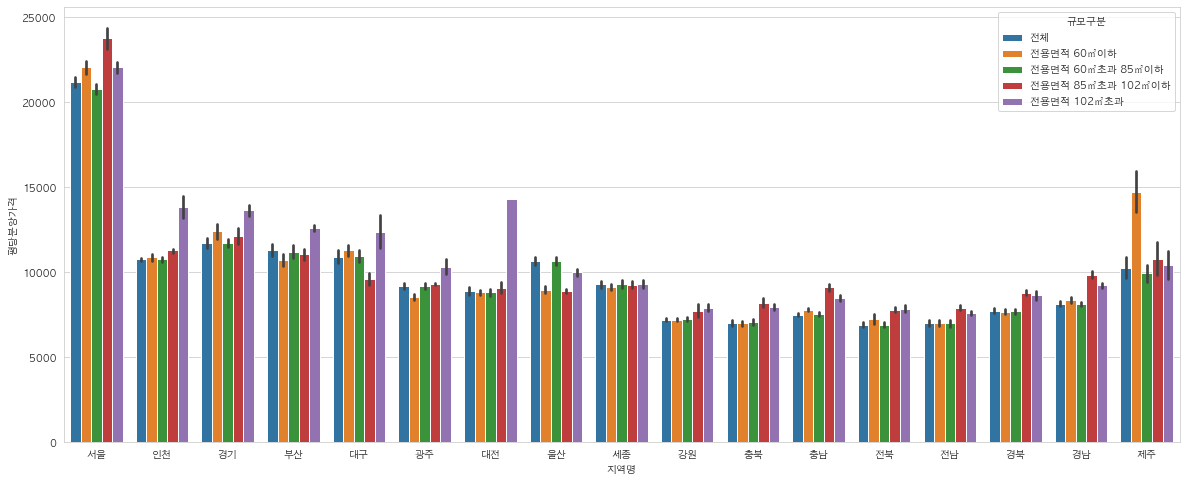

In [35]:
plt.figure(figsize=(20, 8))
sns.barplot(data=pre_sale, x='지역명', y='평당분양가격', hue='규모구분')

대전의 전용면적 102제곱미터 초과부분은 검은색 선(신뢰구간)이 없는데 평균분양가격이 변동이 없거나 결측치가 있는 경우이다. 

# 지역별 평당 분양가격 합계

+ 아래의 데이터로 규모(제곱미터)에 따른 평당 분양가격을 본다. 

In [36]:
pre_sale_size = pre_sale.pivot_table(values='평당분양가격', index='지역명', columns='규모구분')
pre_sale_size.sample(3)

# shift + tab

규모구분,전용면적 102㎡초과,전용면적 60㎡이하,전용면적 60㎡초과 85㎡이하,전용면적 85㎡초과 102㎡이하,전체
지역명,,,,,
전북,"7,842","7,232","6,891","7,770","6,902"
제주,"10,416","14,700","9,943","10,739","10,253"
대전,"14,282","8,798","8,807","9,037","8,880"


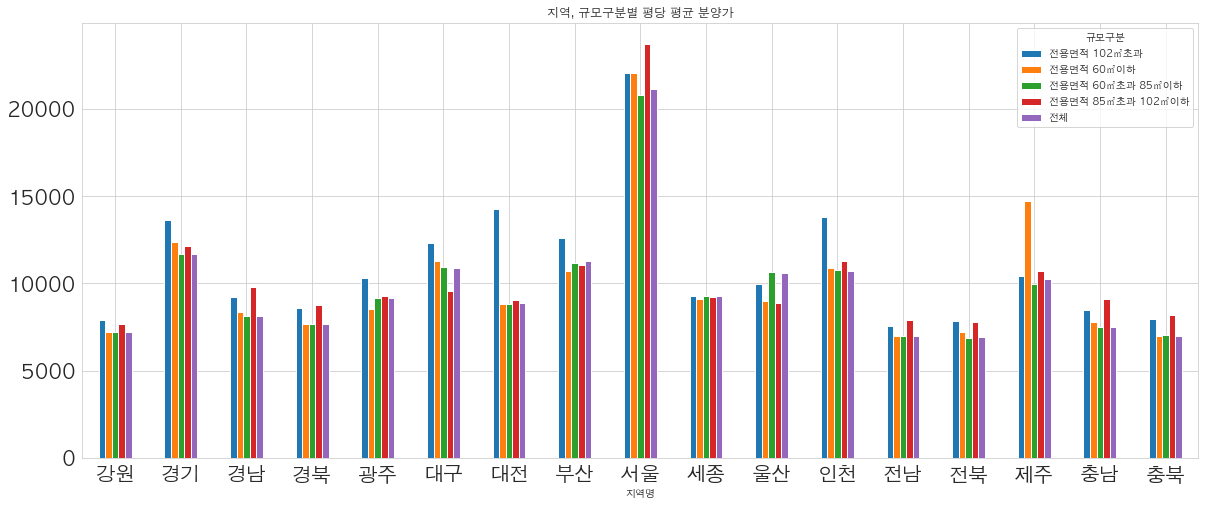

In [37]:
pre_sale_size.plot.bar(title='지역, 규모구분별 평당 평균 분양가',
                       figsize=(20, 8), grid=True, fontsize=20, rot=0 )

왜 대전이 높은지 알기 위해서 대전만 따로 데이터를 본다. 

In [38]:
pre_sale[(pre_sale['지역명'] == '대전') & (pre_sale['규모구분'] == '전용면적 102㎡초과')]

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
34,대전,전용면적 102㎡초과,2015,10,,nan,nan
119,대전,전용면적 102㎡초과,2015,11,,nan,nan
204,대전,전용면적 102㎡초과,2015,12,,nan,nan
289,대전,전용면적 102㎡초과,2016,1,,nan,nan
374,대전,전용면적 102㎡초과,2016,2,NaN,nan,nan
459,대전,전용면적 102㎡초과,2016,3,NaN,nan,nan
544,대전,전용면적 102㎡초과,2016,4,NaN,nan,nan
629,대전,전용면적 102㎡초과,2016,5,NaN,nan,nan
714,대전,전용면적 102㎡초과,2016,6,NaN,nan,nan
799,대전,전용면적 102㎡초과,2016,7,NaN,nan,nan


위에 데이터를 보면 결측치가 굉장히 많은 것을 알 수 있다.  
또한, 같은 데이터가 여러 번 들어갔으므로 seaborn을 이용하여 barplot을 그렸을 때 신뢰구간이 없는 이유가 설명이 된다. 

In [39]:
pre_sale_size_t = pre_sale_size.T
pre_sale_size_t.T

규모구분,전용면적 102㎡초과,전용면적 60㎡이하,전용면적 60㎡초과 85㎡이하,전용면적 85㎡초과 102㎡이하,전체
지역명,,,,,
강원,"7,899","7,195","7,228","7,686","7,197"
경기,"13,647","12,385","11,691","12,130","11,706"
경남,"9,226","8,343","8,110","9,822","8,137"
경북,"8,616","7,661","7,690","8,776","7,696"
광주,"10,296","8,518","9,176","9,296","9,167"
대구,"12,334","11,285","10,931","9,589","10,897"
대전,"14,282","8,798","8,807","9,037","8,880"
부산,"12,590","10,707","11,191","11,039","11,295"
서울,"22,058","22,046","20,781","23,754","21,169"


# 전국 규모(면적)별 신규 민간 아파트 분양가격

In [40]:
pre_sale.sample()

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
2814,인천,전용면적 102㎡초과,2018,7,NaN,nan,nan


In [41]:
pre_sale[['지역명', '평당분양가격', '규모구분']].sample(3)

,지역명,평당분양가격,규모구분
301,강원,"7,557",전용면적 60㎡이하
2477,경기,"12,626",전용면적 60㎡초과 85㎡이하
729,강원,"7,719",전용면적 102㎡초과


In [42]:
pre_sale.shape

(2890, 7)

In [43]:
pre_sale['평당분양가격'].isnull().sum() # isnull()은 true와 false로 구분함. true인 것만 더해서 보여주는 것이 sum()

232

결측치를 확인한다. 

In [44]:
pre_sale['평당분양가격'].dropna(inplace=True, axis=0) # inplace를 해야만 반영이 된다. 

결측치가 있으면 제대로 된 시각화를 하기 어렵기 때문에 행을 drop한다. 

In [45]:
pre_sale['평당분양가격'].isnull().sum()

0

In [46]:
pre_sale.dtypes

지역명         object
규모구분        object
연도          object
월           object
분양가격(㎡)     object
분양가격       float64
평당분양가격     float64
dtype: object

In [47]:
# 수치형 데이터로 변경한다. 
pre_sale['평당분양가격'] = pre_sale['평당분양가격'].astype(int)

In [48]:
pre_sale[pre_sale['평당분양가격'] == 0]

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격


In [49]:
pre_sale['규모구분'].unique() # unique는 중복을 제거한 값을 보여준다. 

array(['전체', '전용면적 60㎡이하', '전용면적 60㎡초과 85㎡이하', '전용면적 85㎡초과 102㎡이하',
       '전용면적 102㎡초과'], dtype=object)

In [50]:
pre_sale_size.sample(3)

규모구분,전용면적 102㎡초과,전용면적 60㎡이하,전용면적 60㎡초과 85㎡이하,전용면적 85㎡초과 102㎡이하,전체
지역명,,,,,
대구,"12,334","11,285","10,931","9,589","10,897"
전남,"7,568","6,991","6,968","7,882","6,982"
제주,"10,416","14,700","9,943","10,739","10,253"


# 상자 수염 그림

+ 위에는 최대값, 밑에는 최솟값을 의미하며, 동그라미 값들은 이상치를 의미함.   
+ 수염의 길이는 신뢰구간을 의미하는데, 양 극단에 있는 값을 제거를 한 95%의 값이 위치하고 있다고 보여진다.   
1. 최솟값  
2. 제 1사분위수  
3. 제 2사분위수, 즉 중앙값
4. 제 3사분위수  
5. 최댓값

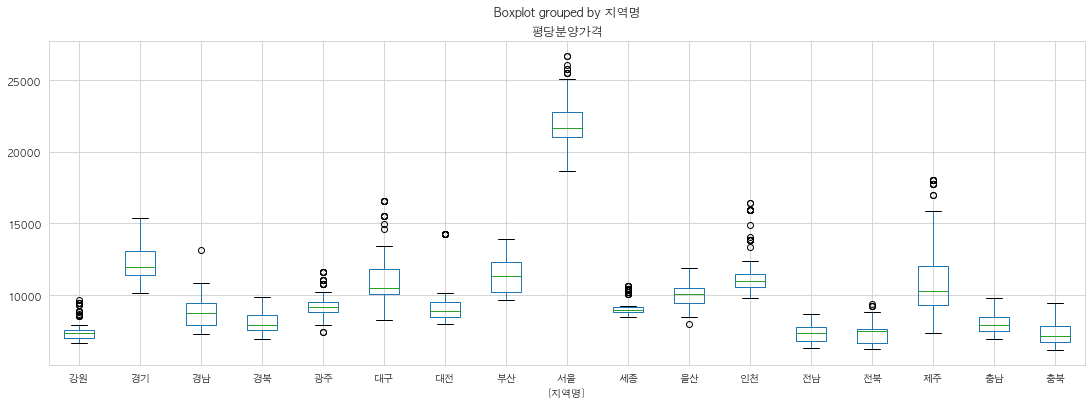

In [51]:
pre_sale[['지역명', '평당분양가격']].boxplot(by=['지역명'], figsize=(18,6))

이상치를 파악하기 위해서 boxplot을 사용하기도 한다. 

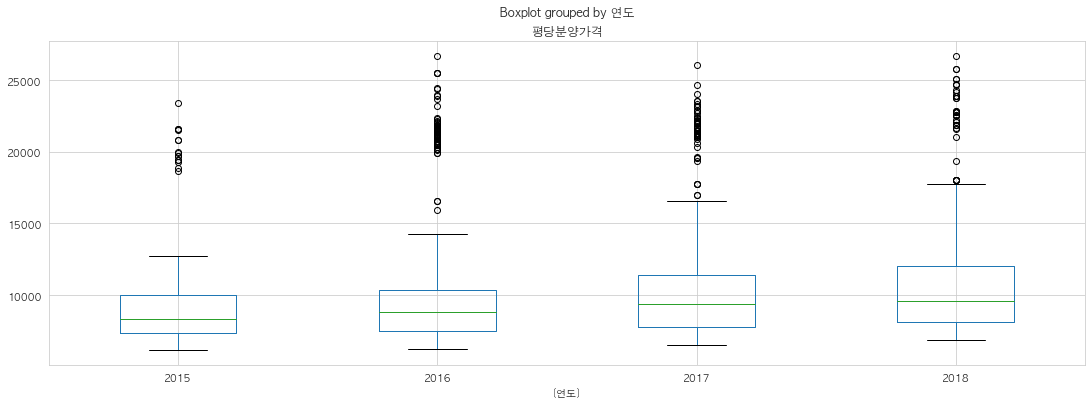

In [52]:
pre_sale[['연도', '지역명', '평당분양가격']].boxplot(by=['연도'], figsize=(18,6))

박스들이 긴 것은 값들의 편차가 크다는 것을 의미한다.  
반대로 박스들이 납작한 것은 값들이 모여있음을 의미한다. 

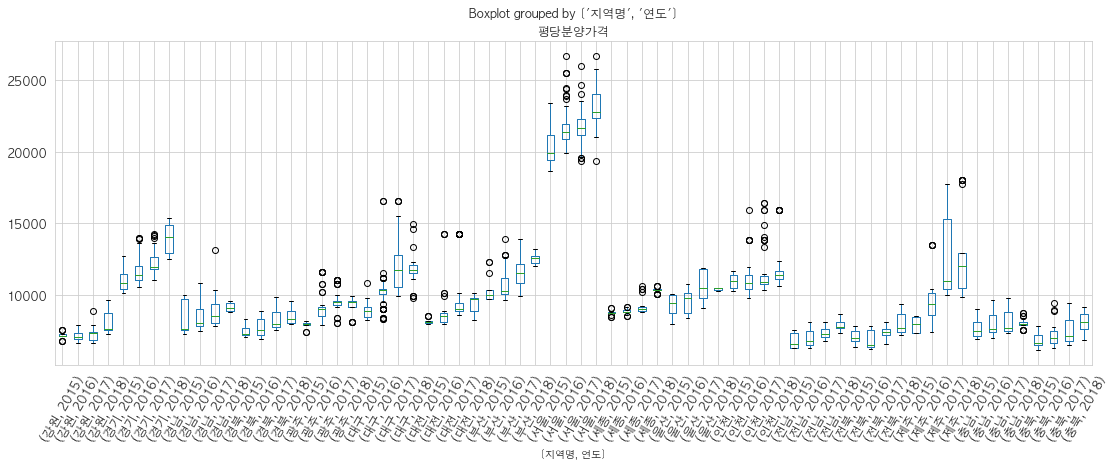

In [53]:
pre_sale[['연도', '지역명', '평당분양가격']].boxplot(
    by=['지역명', '연도'],
    figsize=(18,6),
    fontsize=12,
    rot=60
)

In [54]:
pre_sale_seoul = pre_sale[pre_sale['지역명'] == '서울']

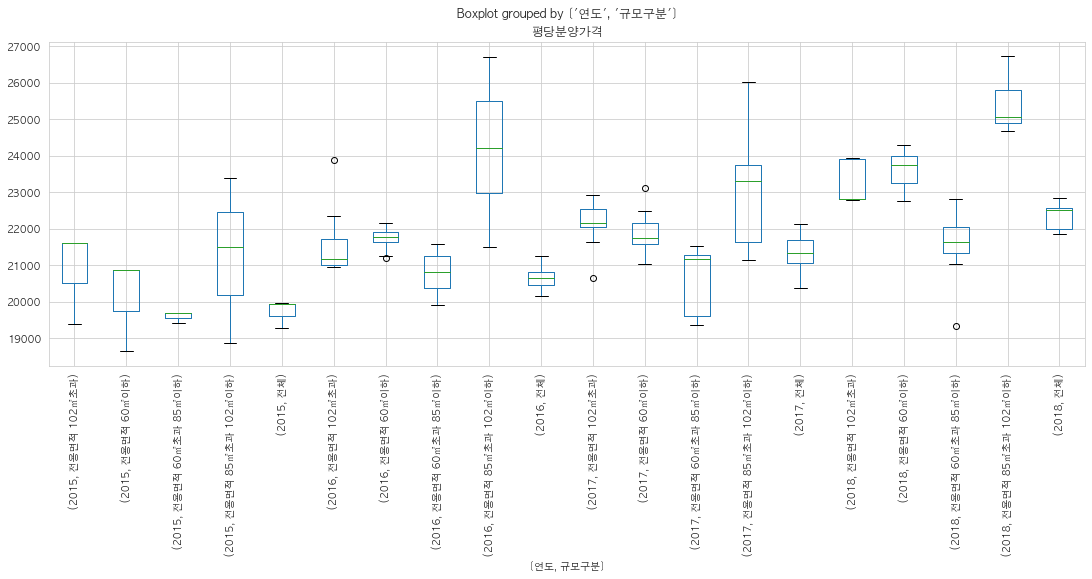

In [55]:
pre_sale_seoul[['연도', '규모구분', '평당분양가격']].boxplot(
    by=['연도', '규모구분'],
    figsize=(18,6), rot=90
)

In [56]:
pre_sale_jeju = pre_sale[pre_sale['지역명'] == '제주']

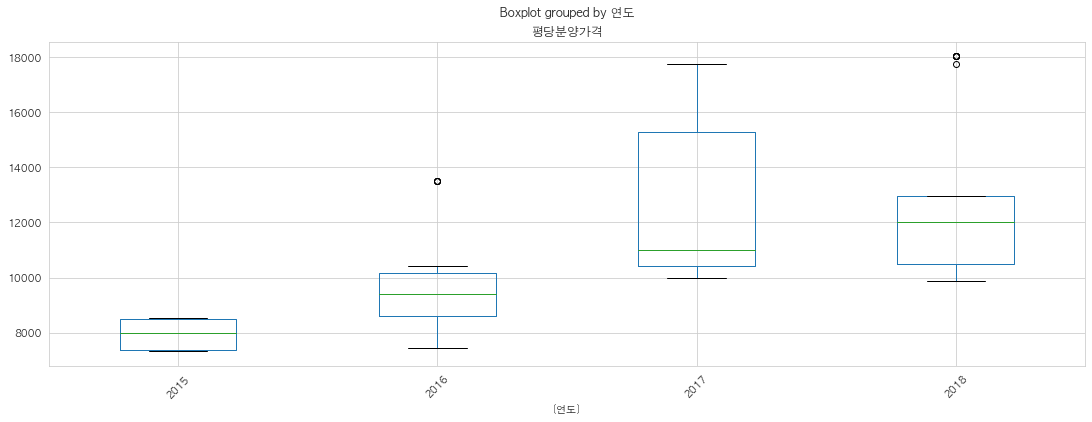

In [57]:
pre_sale_jeju[['연도', '평당분양가격']].boxplot(
    by=['연도'],
    figsize=(18,6), rot=45
)